Welcome to this notebook. In this notebook a simple neural network is demonstrated.<br>
Written by Bart Bozon, please copy & use as you would like.

1) The assignment: study the influence of the number of neurons in the hidden layers. Double them, quadruple them and assess the performance. Also study the size of the model and the time it needs to learn.
2) Bonus assignment: what is the result of a different activation function?

# Loading the data #

In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/bbozon/DataScience/refs/heads/main/Fish.csv'
#
# origin: https://documentation.sas.com/doc/en/statug/15.2/statug_sashelp_sect012.htm
# For each of the seven species (bream, roach, whitefish, parkki, perch, pike, and smelt),
# the weight, length, height, and width of each fish are tallied.
# Three different length measurements are recorded: from the nose of the fish to the beginning
# of its tail, from the nose to the notch of its tail, and from the nose to the end of its tail.
#
df = pd.read_csv(url)
df.head()

,Category,Species,Weight,Height,Width,Length1,Length2,Length3
0,1,Bream,242.0,11.5200,4.0200,23.2,25.4,30.0
1,1,Bream,290.0,12.4800,4.3056,24.0,26.3,31.2
2,1,Bream,340.0,12.3778,4.6961,23.9,26.5,31.1
3,1,Bream,363.0,12.7300,4.4555,26.3,29.0,33.5
4,1,Bream,430.0,12.4440,5.1340,26.5,29.0,34.0


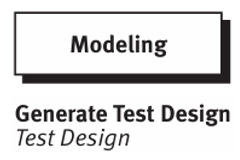

In [2]:
X=df.drop(['Category','Species'],axis=1)
y=df['Species']

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()                       # Use LabelEncoder to convert labels to integers
y_encoded = label_encoder.fit_transform(y)           # Automatically maps labels to integers

import numpy as np
max_classes=np.max(y_encoded)+1

import tensorflow as tf
y_one_hot = tf.keras.utils.to_categorical(y_encoded, num_classes=max_classes) # Convert integers to one-hot encoding
print (y_one_hot)

from sklearn.model_selection import train_test_split
# we always want to work with a training, validation and test data set
X_train, X_valid_plus_test, y_train, y_valid_plus_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)
X_test, X_validation, y_test,y_validation = train_test_split(X_valid_plus_test, y_valid_plus_test, test_size=0.5, random_state=42)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


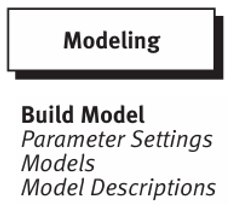

In [3]:
model = tf.keras.models.Sequential([
   tf.keras.layers.Input(shape=(6,)),               # Input layer for 6 numerical features
    tf.keras.layers.Dense(16, activation='relu'),   # First hidden layer
    tf.keras.layers.Dense(16, activation='relu'),   # First hidden layer
    tf.keras.layers.Dense(max_classes, activation='softmax')  # Output layer for the amount of classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           119 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 503 (1.96 KB)

 Trainable params: 503 (1.96 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_validation, y_validation))

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - accuracy: 0.0236 - loss: 156.4558 - val_accuracy: 0.0625 - val_loss: 195.3156
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.0236 - loss: 124.4626 - val_accuracy: 0.0625 - val_loss: 151.8985
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.0236 - loss: 94.1995 - val_accuracy: 0.0625 - val_loss: 109.1052
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0472 - loss: 62.0948 - val_accuracy: 0.0625 - val_loss: 68.0538
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.1575 - loss: 38.3511 - val_accuracy: 0.0000e+00 - val_loss: 48.2079
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.1417 - loss: 28.1911 - val_accuracy: 0.0000e+00 - val_loss: 29.1108
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.1102 - loss: 15.1692 - val_accuracy: 0.3125 - val_loss: 13.5506
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.1969 - loss: 9.4973 - val_

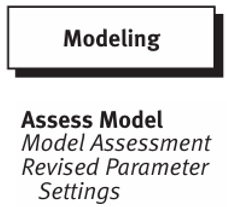

In [5]:
val_loss, val_accuracy = model.evaluate(X_validation, y_validation)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6250 - loss: 1.2393
Validation Loss: 1.2392680644989014
Validation Accuracy: 0.625


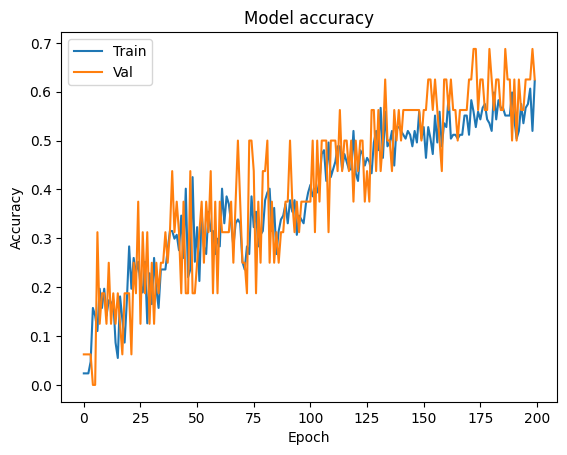

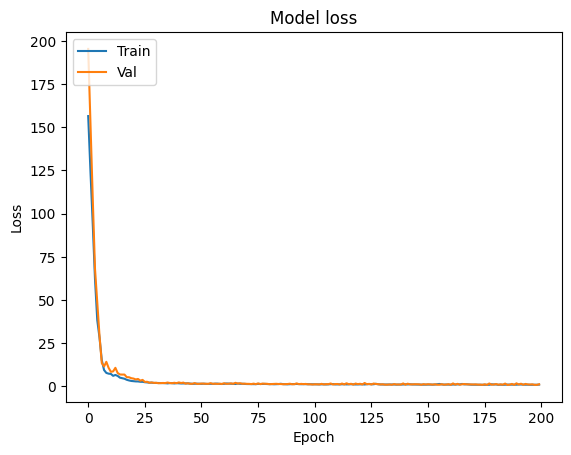

In [6]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
accuracy is : 0.75


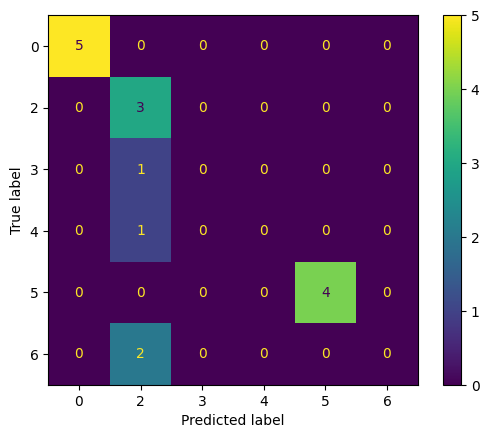

In [ ]:
# Make predictions on the test set
predictions = model.predict(X_test)
pred = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score
import matplotlib.pyplot as plt
ConfusionMatrixDisplay.from_predictions(true_classes, pred)
print ('accuracy is :',accuracy_score(true_classes, pred))


Doubling the number of neurons in each layer and retraining the model

In [7]:
model_32 = tf.keras.models.Sequential([
   tf.keras.layers.Input(shape=(6,)),               # Input layer for 6 numerical features
    tf.keras.layers.Dense(32, activation='relu'),   # First hidden layer
    tf.keras.layers.Dense(32, activation='relu'),   # First hidden layer
    tf.keras.layers.Dense(max_classes, activation='softmax')  # Output layer for the amount of classes
])

# Compile the model_32
model_32.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model_32
model_32.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,511 (5.90 KB)

 Trainable params: 1,511 (5.90 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = model_32.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_validation, y_validation))

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.1575 - loss: 36.8637 - val_accuracy: 0.1875 - val_loss: 56.1209
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2047 - loss: 27.0396 - val_accuracy: 0.1875 - val_loss: 47.1022
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.1969 - loss: 20.1225 - val_accuracy: 0.1875 - val_loss: 31.7367
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.2205 - loss: 11.6110 - val_accuracy: 0.3125 - val_loss: 21.8459
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.2126 - loss: 12.0995 - val_accuracy: 0.3750 - val_loss: 20.8867
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2205 - loss: 10.4794 - val_accuracy: 0.1250 - val_loss: 18.9689
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.1575 - loss: 8.6365 - val_accuracy: 0.2500 - val_loss: 15.2923
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2520 - loss: 6.9757 - val_accuracy: 0.187

In [16]:
val_loss, val_accuracy = model_32.evaluate(X_validation, y_validation)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7500 - loss: 0.6193
Validation Loss: 0.6193456649780273
Validation Accuracy: 0.75


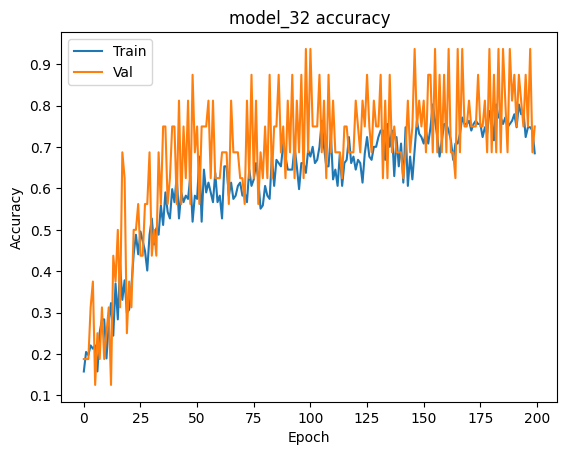

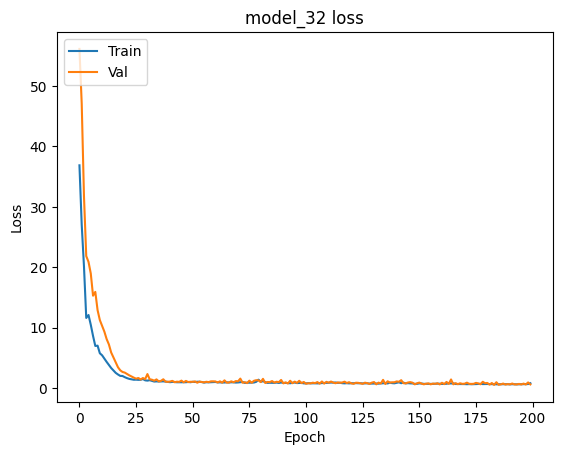

In [9]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_32 accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_32 loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
accuracy is : 0.6875


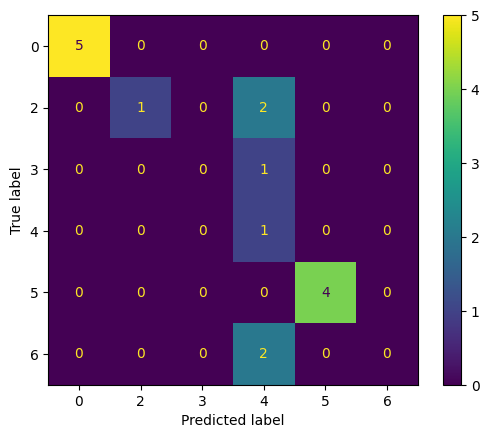

In [10]:
# Make predictions on the test set
predictions = model_32.predict(X_test)
pred = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score
import matplotlib.pyplot as plt
ConfusionMatrixDisplay.from_predictions(true_classes, pred)
print ('accuracy is :',accuracy_score(true_classes, pred))


Now double number of nurons again and retrain the model

In [11]:
model_64 = tf.keras.models.Sequential([
   tf.keras.layers.Input(shape=(6,)),               # Input layer for 6 numerical features
    tf.keras.layers.Dense(64, activation='relu'),   # First hidden layer
    tf.keras.layers.Dense(64, activation='relu'),   # First hidden layer
    tf.keras.layers.Dense(max_classes, activation='softmax')  # Output layer for the amount of classes
])

# Compile the model_64
model_64.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model_64
model_64.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,063 (19.78 KB)

 Trainable params: 5,063 (19.78 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
history = model_64.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_validation, y_validation))

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.2598 - loss: 12.7530 - val_accuracy: 0.3125 - val_loss: 11.1608
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.1732 - loss: 8.3279 - val_accuracy: 0.1250 - val_loss: 6.1078
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.1732 - loss: 4.3816 - val_accuracy: 0.3750 - val_loss: 4.1636
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.2283 - loss: 2.6978 - val_accuracy: 0.5000 - val_loss: 3.3505
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.2992 - loss: 2.6155 - val_accuracy: 0.3750 - val_loss: 2.3173
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4252 - loss: 2.4072 - val_accuracy: 0.3750 - val_loss: 3.1055
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4016 - loss: 2.2824 - val_accuracy: 0.4375 - val_loss: 3.2207
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4567 - loss: 1.8351 - val_accuracy: 0.4375 - val_los

In [17]:
val_loss, val_accuracy = model_64.evaluate(X_validation, y_validation)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9375 - loss: 0.6917
Validation Loss: 0.6917171478271484
Validation Accuracy: 0.9375


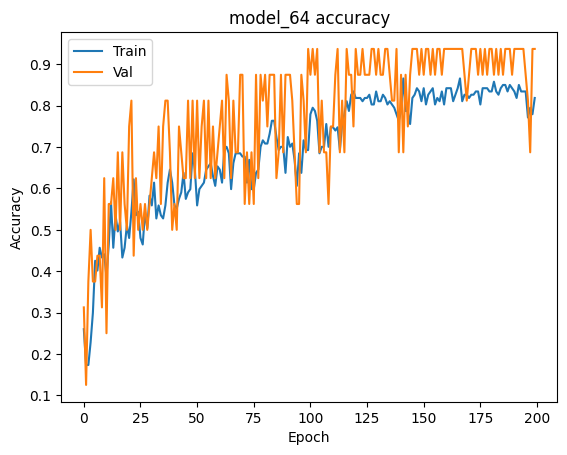

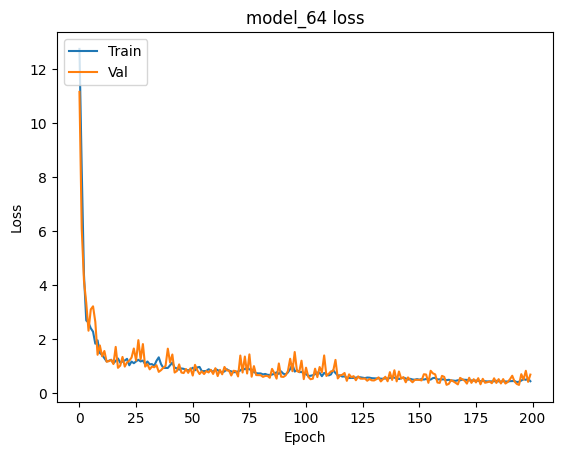

In [13]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_64 accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_64 loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
accuracy is : 0.75


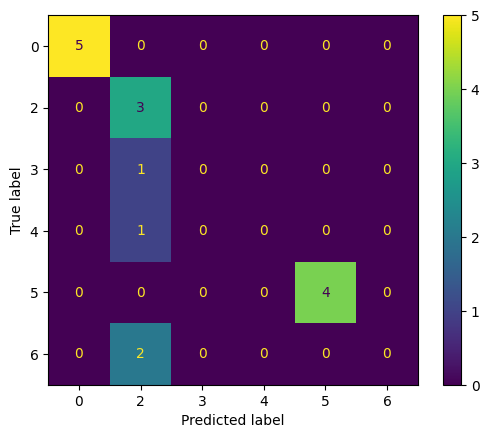

In [14]:
# Make predictions on the test set
predictions_64 = model_64.predict(X_test)
pred = np.argmax(predictions_64, axis=1)
true_classes = np.argmax(y_test, axis=1)
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score
import matplotlib.pyplot as plt
ConfusionMatrixDisplay.from_predictions(true_classes, pred)
print ('accuracy is :',accuracy_score(true_classes, pred))


# Conclusion
The model with 64 neurons in each layer performed the best. It achieved the highest validation accuracy. <br>

16 neurons <br>
503 parameters <br>
Validation Loss: 1.2392680644989014 <br>
Validation Accuracy: 0.625 <br>

32 neurons <br>
1511 prameters <br>
Validation Loss: 0.6193456649780273 <br>
Validation Accuracy: 0.75 <br>

64 neurons <br>
5063 <br>
Validation Loss: 0.6917171478271484 <br>
Validation Accuracy: 0.9375 <br>

Using sigmoid activation function instead of relu, using the 64 neuron model.

In [18]:
model_64_sigmoid = tf.keras.models.Sequential([
   tf.keras.layers.Input(shape=(6,)),               # Input layer for 6 numerical features
    tf.keras.layers.Dense(64, activation='sigmoid'),   # First hidden layer
    tf.keras.layers.Dense(64, activation='sigmoid'),   # First hidden layer
    tf.keras.layers.Dense(max_classes, activation='softmax')  # Output layer for the amount of classes
])

# Compile the model_64_sigmoid
model_64_sigmoid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model_64_sigmoid
model_64_sigmoid.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,063 (19.78 KB)

 Trainable params: 5,063 (19.78 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
history = model_64_sigmoid.fit(X_train, y_train, epochs=400, batch_size=32, validation_data=(X_validation, y_validation))

Epoch 1/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8346 - loss: 0.4803 - val_accuracy: 0.9375 - val_loss: 0.3963
Epoch 2/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8189 - loss: 0.4763 - val_accuracy: 0.8750 - val_loss: 0.4046
Epoch 3/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8189 - loss: 0.4743 - val_accuracy: 0.8750 - val_loss: 0.3998
Epoch 4/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8189 - loss: 0.4740 - val_accuracy: 0.9375 - val_loss: 0.3872
Epoch 5/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8425 - loss: 0.4723 - val_accuracy: 0.9375 - val_loss: 0.3851
Epoch 6/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8268 - loss: 0.4649 - val_accuracy: 0.8750 - val_loss: 0.4005
Epoch 7/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8189 - loss: 0.4715 - val_accuracy: 0.8750 - val_loss: 0.4029
Epoch 8/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8268 - loss: 0.4654 - val_accuracy: 0.9375 - val_loss:

In [24]:
val_loss, val_accuracy = model_64_sigmoid.evaluate(X_validation, y_validation)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9375 - loss: 0.1652
Validation Loss: 0.16519488394260406
Validation Accuracy: 0.9375


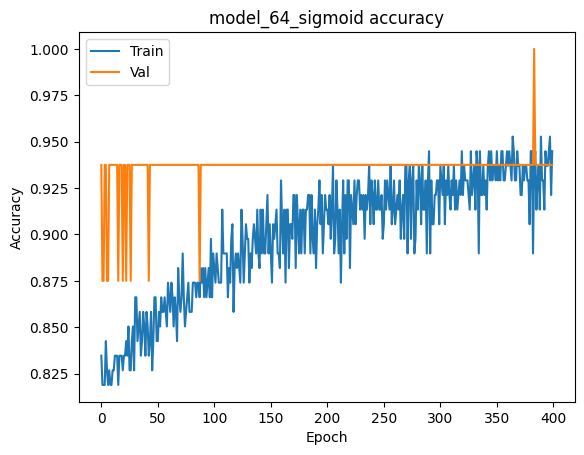

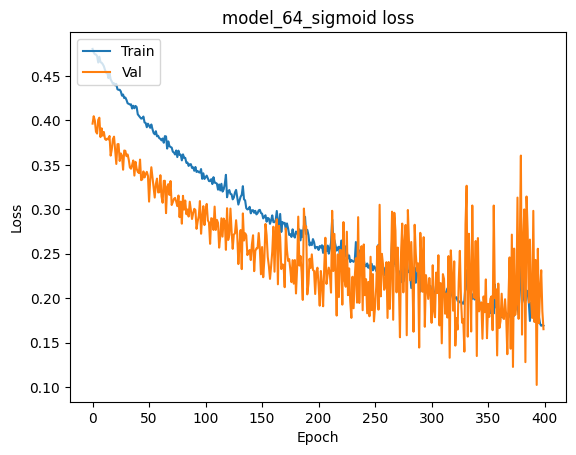

In [25]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_64_sigmoid accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_64_sigmoid loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
accuracy is : 0.75


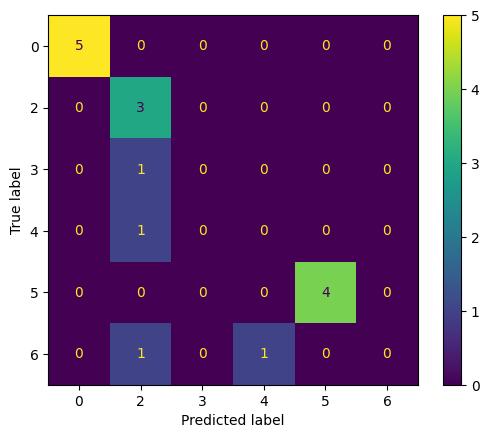

In [22]:
# Make predictions on the test set
predictions_64 = model_64_sigmoid.predict(X_test)
pred = np.argmax(predictions_64, axis=1)
true_classes = np.argmax(y_test, axis=1)
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score
import matplotlib.pyplot as plt
ConfusionMatrixDisplay.from_predictions(true_classes, pred)
print ('accuracy is :',accuracy_score(true_classes, pred))


The model with sigmoid gives the same accuracy as the relu model but has a lower loss. If i change the amount of epochs to 400 the validation loss keeps getting more variated and the accuracy does not improve much.